In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 50, 501)

In [3]:
x.shape

(501,)

In [4]:
y = np.sin(x)

In [5]:
y.shape

(501,)

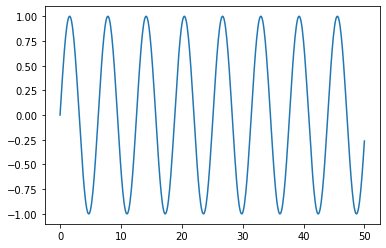

In [6]:
plt.plot(x, y)

In [7]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


#### Splitting for time series data
As we know, we do not use the og scikit learn method to perform the train test split in this type of problem
We generally take a % out of the training data for testing range

In [9]:
test_percent = 0.1 # (10%)

In [10]:
test_point = np.round(len(df) * test_percent)

In [11]:
test_point

50.0

In [12]:
test_index = int(len(df) - test_point)

In [13]:
test_index

451

In [14]:
train = df.iloc[:test_index]

In [15]:
test = df.iloc[test_index:]

In [16]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [17]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


##### Scaling the data

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaled_train = scaler.fit_transform(train)

In [20]:
scaled_test = scaler.transform(test)

#### Creating batches

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = batch_size)

In [23]:
len(scaled_train)

451

In [24]:
len(generator)

401

In [25]:
X, Y = generator[0]

In [26]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [27]:
Y

array([[0.02053313]])

<AxesSubplot:>

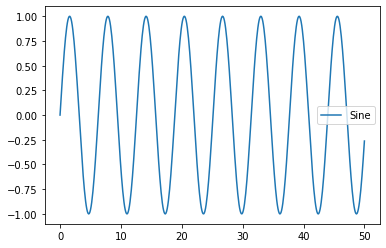

In [28]:
df.plot()

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [30]:
n_features = 1

In [31]:
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [33]:
%%time
model.fit_generator(generator, epochs = 5)

Epoch 1/5


<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


401/401 [==============================] - 11s 26ms/step - loss: 0.0077
Epoch 2/5
401/401 [==============================] - 10s 26ms/step - loss: 5.6187e-05
Epoch 3/5
401/401 [==============================] - 12s 31ms/step - loss: 4.8532e-04
Epoch 4/5
401/401 [==============================] - 13s 31ms/step - loss: 3.6155e-05
Epoch 5/5
401/401 [==============================] - 13s 31ms/step - loss: 4.1979e-04
CPU times: total: 1min 43s
Wall time: 59.5 s


In [34]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

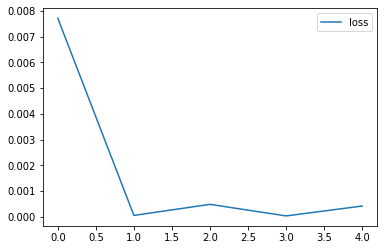

In [35]:
losses.plot()

In [36]:
first_eval_batch = scaled_train[-length:]

In [37]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [38]:
model.predict(first_eval_batch)

array([[0.9507757]], dtype=float32)

In [39]:
scaled_test[0]

array([0.94955134])

In [40]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [41]:
# predicted_value = [[[99]]]
# np.append(current_batch[:, 1:, :], [[[99]]], axis = 1)

In [42]:
test_pred

[array([0.9507757], dtype=float32),
 array([0.9697196], dtype=float32),
 array([0.984286], dtype=float32),
 array([0.99394906], dtype=float32),
 array([0.99806577], dtype=float32),
 array([0.99660045], dtype=float32),
 array([0.990827], dtype=float32),
 array([0.979598], dtype=float32),
 array([0.96359926], dtype=float32),
 array([0.94325906], dtype=float32),
 array([0.9190714], dtype=float32),
 array([0.8904876], dtype=float32),
 array([0.85856247], dtype=float32),
 array([0.82354003], dtype=float32),
 array([0.7856494], dtype=float32),
 array([0.74486846], dtype=float32),
 array([0.70252645], dtype=float32),
 array([0.6581615], dtype=float32),
 array([0.61243814], dtype=float32),
 array([0.5657219], dtype=float32),
 array([0.518669], dtype=float32),
 array([0.47100654], dtype=float32),
 array([0.42374432], dtype=float32),
 array([0.37695092], dtype=float32),
 array([0.33127138], dtype=float32),
 array([0.28677502], dtype=float32),
 array([0.2443498], dtype=float32),
 array([0.2042390

In [43]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [44]:
true_pred = scaler.inverse_transform(test_pred)

In [45]:
true_pred

array([[ 0.9015459 ],
       [ 0.93943341],
       [ 0.96856602],
       [ 0.98789195],
       [ 0.99612531],
       [ 0.9931947 ],
       [ 0.98164794],
       [ 0.95919004],
       [ 0.92719286],
       [ 0.88651277],
       [ 0.83813779],
       [ 0.78097072],
       [ 0.71712095],
       [ 0.64707664],
       [ 0.57129602],
       [ 0.48973475],
       [ 0.40505142],
       [ 0.31632227],
       [ 0.22487625],
       [ 0.13144457],
       [ 0.03733949],
       [-0.05798468],
       [-0.15250837],
       [-0.24609442],
       [-0.33745276],
       [-0.42644476],
       [-0.51129454],
       [-0.5915154 ],
       [-0.6663012 ],
       [-0.73475134],
       [-0.79520358],
       [-0.8481377 ],
       [-0.89216306],
       [-0.92660305],
       [-0.95112239],
       [-0.9664712 ],
       [-0.97107548],
       [-0.96556796],
       [-0.95091708],
       [-0.92704093],
       [-0.89310409],
       [-0.85180349],
       [-0.8030324 ],
       [-0.74600654],
       [-0.68286514],
       [-0

In [46]:
test['Predictions'] = true_pred

C:\Users\91773\AppData\Local\Temp\ipykernel_15784\3456487850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_pred


In [47]:
test

,Sine,Predictions
45.1,0.899097,0.901546
45.2,0.938307,0.939433
45.3,0.968142,0.968566
45.4,0.988304,0.987892
45.5,0.998591,0.996125
45.6,0.998900,0.993195
45.7,0.989229,0.981648
45.8,0.969673,0.959190
45.9,0.940429,0.927193
46.0,0.901788,0.886513


<AxesSubplot:>

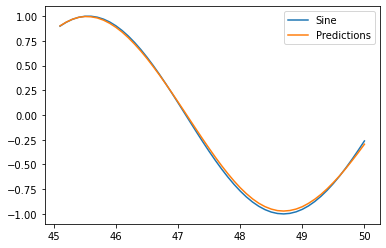

In [48]:
test.plot()

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [51]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = 1)

In [52]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [53]:
%%time
model.fit_generator(generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])

Epoch 1/20


<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


402/402 [==============================] - 4s 5ms/step - loss: 0.0147 - val_loss: 1.7555e-04
Epoch 2/20
402/402 [==============================] - 2s 5ms/step - loss: 2.0905e-04 - val_loss: 1.0021e-04
Epoch 3/20
402/402 [==============================] - 2s 5ms/step - loss: 3.1772e-04 - val_loss: 9.3694e-05
Epoch 4/20
402/402 [==============================] - 2s 5ms/step - loss: 9.4897e-05 - val_loss: 2.4858e-05
Epoch 5/20
402/402 [==============================] - 2s 4ms/step - loss: 5.1144e-05 - val_loss: 2.2256e-05
Epoch 6/20
402/402 [==============================] - 2s 5ms/step - loss: 1.9271e-04 - val_loss: 8.9314e-05
Epoch 7/20
402/402 [==============================] - 2s 5ms/step - loss: 1.0208e-04 - val_loss: 1.6719e-06
Epoch 8/20
402/402 [==============================] - 2s 4ms/step - loss: 3.3597e-04 - val_loss: 3.9299e-04
Epoch 9/20
402/402 [==============================] - 2s 5ms/step - loss: 9.4033e-04 - val_loss: 5.6466e-06
CPU times: total: 22.8 s
Wall time: 18.9 s


In [54]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

C:\Users\91773\AppData\Local\Temp\ipykernel_15784\436942892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_pred


<AxesSubplot:>

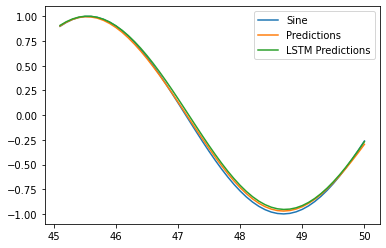

In [55]:
true_pred = scaler.inverse_transform(test_pred)
test['LSTM Predictions'] = true_pred
test.plot()

In [56]:
fullScaler = MinMaxScaler()

scaled_data = fullScaler.fit_transform(df)

In [57]:
generator = TimeseriesGenerator(scaled_data, scaled_data, length = length, batch_size = 1)

In [58]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [59]:
%%time
model.fit_generator(generator, epochs = 10)

Epoch 1/10


<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


452/452 [==============================] - 3s 5ms/step - loss: 0.0105
Epoch 2/10
452/452 [==============================] - 2s 4ms/step - loss: 8.4905e-05
Epoch 3/10
452/452 [==============================] - 2s 5ms/step - loss: 1.1402e-04
Epoch 4/10
452/452 [==============================] - 2s 4ms/step - loss: 5.3206e-04
Epoch 5/10
452/452 [==============================] - 2s 4ms/step - loss: 4.8632e-05
Epoch 6/10
452/452 [==============================] - 2s 4ms/step - loss: 3.9462e-05
Epoch 7/10
452/452 [==============================] - 2s 4ms/step - loss: 6.3530e-05
Epoch 8/10
452/452 [==============================] - 2s 4ms/step - loss: 1.2088e-04
Epoch 9/10
452/452 [==============================] - 2s 4ms/step - loss: 1.6306e-04
Epoch 10/10
452/452 [==============================] - 2s 4ms/step - loss: 2.0433e-05
CPU times: total: 26.2 s
Wall time: 21.2 s


In [60]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [61]:
forecast = scaler.inverse_transform(forecast)

In [62]:
forecast

array([[ 0.90004304],
       [ 0.93793448],
       [ 0.96609244],
       [ 0.98417623],
       [ 0.99195457],
       [ 0.9893091 ],
       [ 0.9762335 ],
       [ 0.95282932],
       [ 0.91930258],
       [ 0.87595962],
       [ 0.8232023 ],
       [ 0.76152367],
       [ 0.69150499],
       [ 0.61381191],
       [ 0.52919188],
       [ 0.43847052],
       [ 0.34254739],
       [ 0.24239046],
       [ 0.13902801],
       [ 0.03353758],
       [-0.07296649],
       [-0.17934931],
       [-0.28447145],
       [-0.38720627],
       [-0.4864568 ]])

In [ ]:
forecast_index = np.arange(50.1, 52.6) # 25 *